3 observable trends:
1. Urban rides are by far the most common.
2. Fares tend to be higher in rural areas which makes sense since things are more spread out in rural settings. 
3. There does not appear to be a strong correlation between city size and number of drivers.


In [71]:
import csv
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
file_name = os.path.join("city_data.csv")
file_name2 = os.path.join("ride_data.csv")

city_df = pd.read_csv(file_name)
ride_df = pd.read_csv(file_name2)

In [73]:
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [74]:
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,1/16/2016 13:49,38.35,5403690000000
1,South Roy,1/2/2016 18:42,17.49,4036270000000
2,Wiseborough,1/21/2016 17:35,44.18,3645040000000
3,Spencertown,7/31/2016 14:53,6.87,2242600000000
4,Nguyenbury,7/9/2016 4:42,6.28,1543060000000


In [75]:
merged_df = pd.merge(city_df, ride_df, on="city", how="right")
merged_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,8/19/2016 4:27,5.51,6246010000000
1,Kelseyland,63,Urban,4/17/2016 6:59,5.54,7466470000000
2,Kelseyland,63,Urban,5/4/2016 15:06,30.54,2140500000000
3,Kelseyland,63,Urban,1/25/2016 20:44,12.08,1896990000000
4,Kelseyland,63,Urban,8/9/2016 18:19,17.91,8784210000000


In [76]:
rides_per_city = merged_df.city.value_counts()
rides_per_city = pd.DataFrame(rides_per_city)
rides_per_city.reset_index(inplace=True)
rides_per_city = rides_per_city.rename(columns = {"city": "Total Rides", "index":"city"})
rides_per_city.head()

,city,Total Rides
0,Port James,64
1,Port Johnstad,34
2,Swansonbury,34
3,South Louis,32
4,Alvarezhaven,31


In [77]:
mean_df = merged_df.groupby('city').agg(np.mean)
mean_df.reset_index(inplace=True)
mean_df.head()

,city,driver_count,fare,ride_id
0,Alvarezhaven,21.0,23.928710,5.351586e+12
1,Alyssaberg,67.0,20.609615,3.536678e+12
2,Anitamouth,16.0,37.315556,4.195869e+12
3,Antoniomouth,21.0,23.625000,5.086801e+12
4,Aprilchester,49.0,21.981579,4.574787e+12


In [78]:
duh_df = pd.merge(mean_df, city_df, on='city', how='outer')
duh_df = pd.merge(duh_df, rides_per_city, on='city')
del duh_df['driver_count_x']
del duh_df['ride_id']
duh_df.head()

,city,fare,driver_count_y,type,Total Rides
0,Alvarezhaven,23.928710,21,Urban,31
1,Alyssaberg,20.609615,67,Urban,26
2,Anitamouth,37.315556,16,Suburban,9
3,Antoniomouth,23.625000,21,Urban,22
4,Aprilchester,21.981579,49,Urban,19


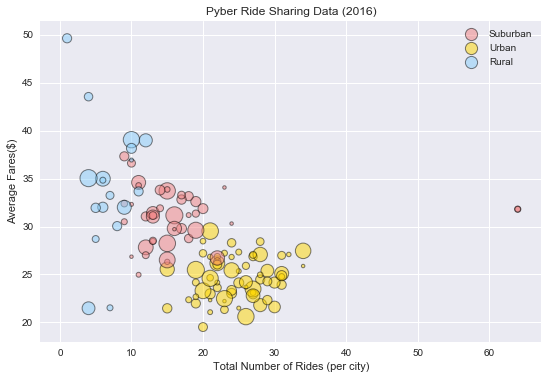

In [79]:
plt.style.use('seaborn')

urban_df = duh_df[duh_df["type"] == "Urban"]
urban_fare = urban_df['fare']
urban_rides = urban_df['Total Rides']

suburban_df = duh_df[duh_df["type"] == "Suburban"]
suburban_fare = suburban_df['fare']
suburban_rides = suburban_df['Total Rides']

rural_df = duh_df[duh_df["type"] == "Rural"]
rural_fare = rural_df['fare']
rural_rides = rural_df['Total Rides']

fare = duh_df['fare']
driver_count = duh_df['driver_count_y']
cities = duh_df['city']
city_loc = duh_df['type']
rides_per_city = duh_df['Total Rides']

urban_plot = plt.scatter(urban_rides, urban_fare, color="gold", s=driver_count*4, alpha=0.5, edgecolors="black", linewidth=1, label="Urban")
suburban_plot = plt.scatter(suburban_rides, suburban_fare, color="lightcoral", s=driver_count*4, alpha=0.5, edgecolors="black", linewidth=1, label="Suburban")
rural_plot = plt.scatter(rural_rides, rural_fare, color="lightskyblue", s=driver_count*4, alpha=0.5, edgecolors="black", linewidth=1, label="Rural")


plt.legend(handles=[suburban_plot, urban_plot, rural_plot], loc='best')

plt.xlabel("Total Number of Rides (per city)")
plt.ylabel("Average Fares($)")
plt.title("Pyber Ride Sharing Data (2016)")

plt.show()

In [80]:
rural_fares = merged_df.loc[merged_df['type'] == 'Rural']
rural_fares_sum = rural_fares['fare'].sum()

suburban_fares = merged_df.loc[merged_df['type'] == 'Suburban']
suburban_fares_sum = suburban_fares['fare'].sum()
suburban_fares_sum

urban_fares = merged_df.loc[merged_df['type'] == 'Urban']
urban_fares_sum = urban_fares['fare'].sum()


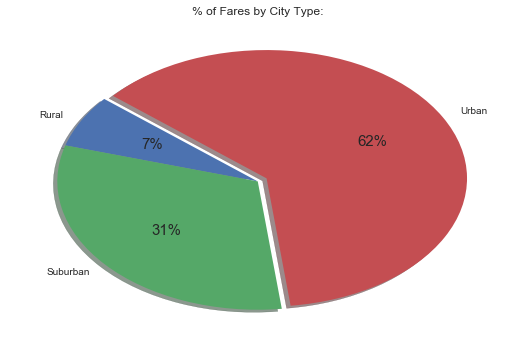

In [89]:
plt.style.use('seaborn')
fare_sums = [rural_fares_sum, suburban_fares_sum, urban_fares_sum]
labels = ["Rural", "Suburban", "Urban"]
plt.rcParams['font.size'] = 15.0
explode = [0,0,0.05]
plt.pie(fare_sums, labels=labels, explode=explode, shadow=True, startangle=140,  autopct='%1.f%%')
plt.title("% of Fares by City Type:")
plt.show()

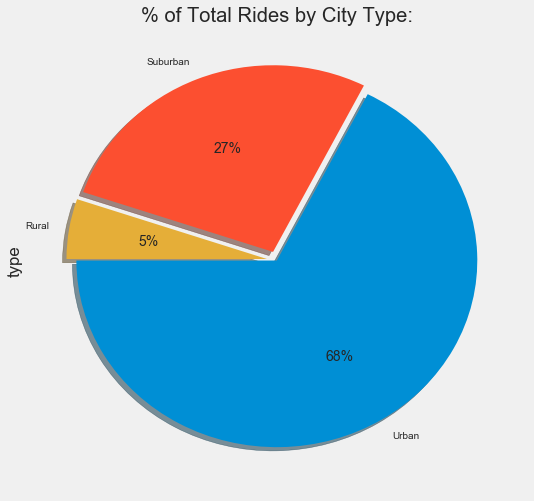

In [82]:
plt.style.use('fivethirtyeight')
Explode = (0, .05, .05)
pie_chart2 = merged_df.type.value_counts().plot(kind='pie', explode=Explode, figsize=(8,8), shadow=True, startangle=180, autopct='%1.f%%')
pie_chart2.set_ylabel = (" ")
plt.title("% of Total Rides by City Type:")
plt.show()

In [83]:
rural_drivers = duh_df.loc[duh_df['type'] == 'Rural'].groupby('type')
rural_driver_count = pd.DataFrame(rural_drivers['driver_count_y'].sum())

suburban_drivers = duh_df.loc[duh_df['type'] == 'Suburban'].groupby('type')
suburban_driver_count = pd.DataFrame(suburban_drivers['driver_count_y'].sum())

urban_drivers = duh_df.loc[duh_df['type'] == 'Urban'].groupby('type')
urban_driver_count = pd.DataFrame(urban_drivers['driver_count_y'].sum())


In [84]:
rural_driver_count

,driver_count_y
type,
Rural,104


In [85]:
suburban_driver_count

,driver_count_y
type,
Suburban,638


In [86]:
urban_driver_count

,driver_count_y
type,
Urban,2607


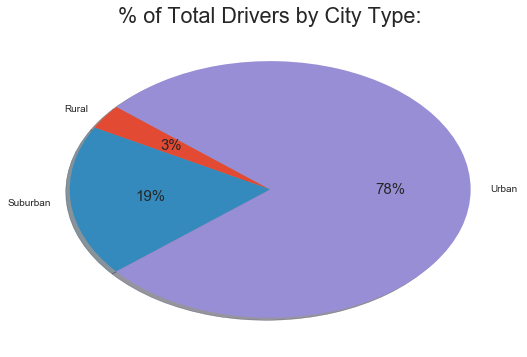

In [88]:
plt.style.use('ggplot')
driver_counts = [104, 638, 2607]
labels = ["Rural", "Suburban", "Urban"]
plt.rcParams['font.size'] = 15.0
plt.pie(driver_counts, labels=labels, shadow=True, startangle=140,  autopct='%1.f%%')
plt.title("% of Total Drivers by City Type:")
plt.show()